In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
from scipy.stats import chi2_contingency

%matplotlib inline

pd.set_option('display.max_columns', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nextmillionaire/car-accident-dataset")

print("Path to dataset files:", path)

accidents = pd.read_csv('/kaggle/input/car-accident-dataset/Road Accident Data.csv', sep = ',')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-accident-dataset/Road Accident Data.csv
Path to dataset files: /kaggle/input/car-accident-dataset


In [2]:
# View shape of data
print(accidents.shape)

(307973, 21)


In [3]:
# View columns
accidents.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
# View all columns non-null counts and datatypes
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [4]:
# Define variable for missing values and statistics summary of dataframe
missing_values = accidents.isnull().sum()
stat_sum = accidents.describe(include='all')

In [5]:
# Viewing columns with missing values, statistical summary of columns
missing_values, stat_sum

(Accident_Index                     0
 Accident Date                      0
 Day_of_Week                        0
 Junction_Control                   0
 Junction_Detail                    0
 Accident_Severity                  0
 Latitude                           0
 Light_Conditions                   0
 Local_Authority_(District)         0
 Carriageway_Hazards           302549
 Longitude                          0
 Number_of_Casualties               0
 Number_of_Vehicles                 0
 Police_Force                       0
 Road_Surface_Conditions          317
 Road_Type                       1534
 Speed_limit                        0
 Time                              17
 Urban_or_Rural_Area                0
 Weather_Conditions              6057
 Vehicle_Type                       0
 dtype: int64,
        Accident_Index Accident Date Day_of_Week          Junction_Control  \
 count          307973        307973      307973                    307973   
 unique         197644         

In [6]:
# Viewing specific columns with missing values
nan_columns = accidents.loc[:, accidents.isnull().any()].columns
print(nan_columns)

Index(['Carriageway_Hazards', 'Road_Surface_Conditions', 'Road_Type', 'Time',
       'Weather_Conditions'],
      dtype='object')


In [7]:
# Viewing percentage of missing values
def nan_percent(df):
    return df.isna().sum()/(len(df)) * 100
print(nan_percent(accidents))

Accident_Index                 0.000000
Accident Date                  0.000000
Day_of_Week                    0.000000
Junction_Control               0.000000
Junction_Detail                0.000000
Accident_Severity              0.000000
Latitude                       0.000000
Light_Conditions               0.000000
Local_Authority_(District)     0.000000
Carriageway_Hazards           98.238807
Longitude                      0.000000
Number_of_Casualties           0.000000
Number_of_Vehicles             0.000000
Police_Force                   0.000000
Road_Surface_Conditions        0.102931
Road_Type                      0.498096
Speed_limit                    0.000000
Time                           0.005520
Urban_or_Rural_Area            0.000000
Weather_Conditions             1.966731
Vehicle_Type                   0.000000
dtype: float64


In [8]:
# Carriageway_Hazards will not be used as part of this analysis.
accidents.drop(columns='Carriageway_Hazards', inplace=True)

In [9]:
# Only 17 rows are missing, removing them as it will not impact analysis
accidents.dropna(subset=['Time'], inplace=True)

In [10]:
# Replacing missing values with the mode (most frequent value) of each column
for col in ['Road_Surface_Conditions', 'Road_Type', 'Weather_Conditions']:
    accidents[col].fillna(accidents[col].mode()[0], inplace=True)

/tmp/ipykernel_30/3090425815.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accidents[col].fillna(accidents[col].mode()[0], inplace=True)


In [11]:
# Changing time format
accidents['Time'] = accidents['Time'].apply(lambda x: datetime.strptime(x, '%H:%M').time())

In [12]:
# View results
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307956 entries, 0 to 307972
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307956 non-null  object 
 1   Accident Date               307956 non-null  object 
 2   Day_of_Week                 307956 non-null  object 
 3   Junction_Control            307956 non-null  object 
 4   Junction_Detail             307956 non-null  object 
 5   Accident_Severity           307956 non-null  object 
 6   Latitude                    307956 non-null  float64
 7   Light_Conditions            307956 non-null  object 
 8   Local_Authority_(District)  307956 non-null  object 
 9   Longitude                   307956 non-null  float64
 10  Number_of_Casualties        307956 non-null  int64  
 11  Number_of_Vehicles          307956 non-null  int64  
 12  Police_Force                307956 non-null  object 
 13  Road_Surface_Condit

In [13]:
# Filtering out rows that are not at a junction.
filtered_accidents = accidents[accidents['Junction_Detail'] != "Not at junction or within 20 metres"]

In [14]:
# Verify removal
print(filtered_accidents['Junction_Detail'].value_counts())

Junction_Detail
T or staggered junction              96715
Crossroads                           29945
Roundabout                           27264
Private drive or entrance            10874
Other junction                        8313
Slip road                             4265
More than 4 arms (not roundabout)     4148
Mini-roundabout                       3346
Name: count, dtype: int64


In [15]:
# Overall look at filtered dataset
filtered_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184870 entries, 0 to 307972
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              184870 non-null  object 
 1   Accident Date               184870 non-null  object 
 2   Day_of_Week                 184870 non-null  object 
 3   Junction_Control            184870 non-null  object 
 4   Junction_Detail             184870 non-null  object 
 5   Accident_Severity           184870 non-null  object 
 6   Latitude                    184870 non-null  float64
 7   Light_Conditions            184870 non-null  object 
 8   Local_Authority_(District)  184870 non-null  object 
 9   Longitude                   184870 non-null  float64
 10  Number_of_Casualties        184870 non-null  int64  
 11  Number_of_Vehicles          184870 non-null  int64  
 12  Police_Force                184870 non-null  object 
 13  Road_Surface_Condit

In [16]:
# Counting frequency of Junction Control measures
filtered_accidents['Junction_Control'].value_counts()

Junction_Control
Give way or uncontrolled        150035
Auto traffic signal              32254
Stop sign                         1684
Authorised person                  459
Data missing or out of range       349
Auto traffic sigl                   89
Name: count, dtype: int64

In [17]:
# Combine "Auto traffic sigl" with "Auto traffic signal"
filtered_accidents['Junction_Control'] = filtered_accidents['Junction_Control'].replace('Auto traffic sigl', 'Auto traffic signal')

# Display the updated DataFrame
filtered_accidents['Junction_Control'].value_counts()

/tmp/ipykernel_30/2894008425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_accidents['Junction_Control'] = filtered_accidents['Junction_Control'].replace('Auto traffic sigl', 'Auto traffic signal')


Junction_Control
Give way or uncontrolled        150035
Auto traffic signal              32343
Stop sign                         1684
Authorised person                  459
Data missing or out of range       349
Name: count, dtype: int64

In [18]:
# Remove entries with "Data missing or out of range"
filtered_accidents = filtered_accidents[filtered_accidents['Junction_Control'] != 'Data missing or out of range']

# Display the updated DataFrame
filtered_accidents['Junction_Control'].value_counts()

Junction_Control
Give way or uncontrolled    150035
Auto traffic signal          32343
Stop sign                     1684
Authorised person              459
Name: count, dtype: int64

In [19]:
# Counting frequency of road junction types
filtered_accidents['Junction_Detail'].value_counts()

Junction_Detail
T or staggered junction              96715
Crossroads                           29945
Roundabout                           27264
Private drive or entrance            10585
Other junction                        8253
Slip road                             4265
More than 4 arms (not roundabout)     4148
Mini-roundabout                       3346
Name: count, dtype: int64

In [20]:
# Creating contingency table for heatmap and stacked bar chart
con_table = pd.crosstab(filtered_accidents['Junction_Control'], filtered_accidents['Junction_Detail'])

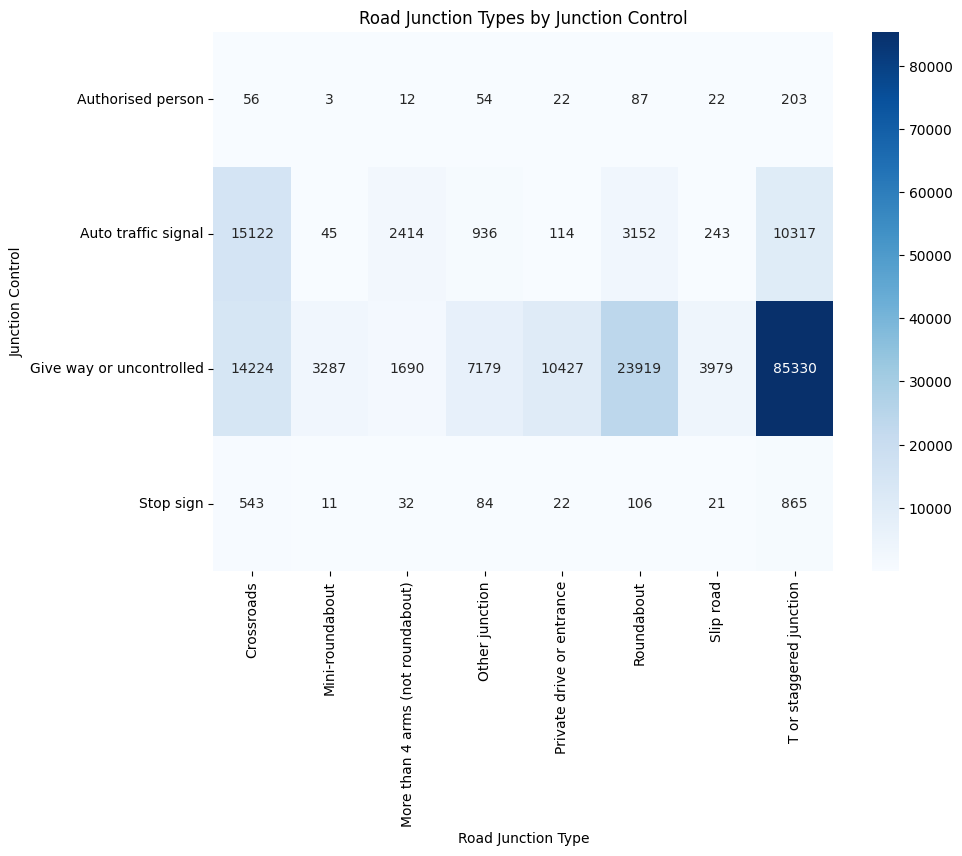

In [21]:
# Create the heatmap showing distributions of road junction types changes across different junction control measures 
plt.figure(figsize = (10, 7))  # Adjust the size of the figure
sns.heatmap(con_table, annot = True, fmt = "d", cmap = "Blues", cbar = True)

# Add title and labels
plt.title('Road Junction Types by Junction Control')
plt.xlabel('Road Junction Type')
plt.ylabel('Junction Control')

plt.show()

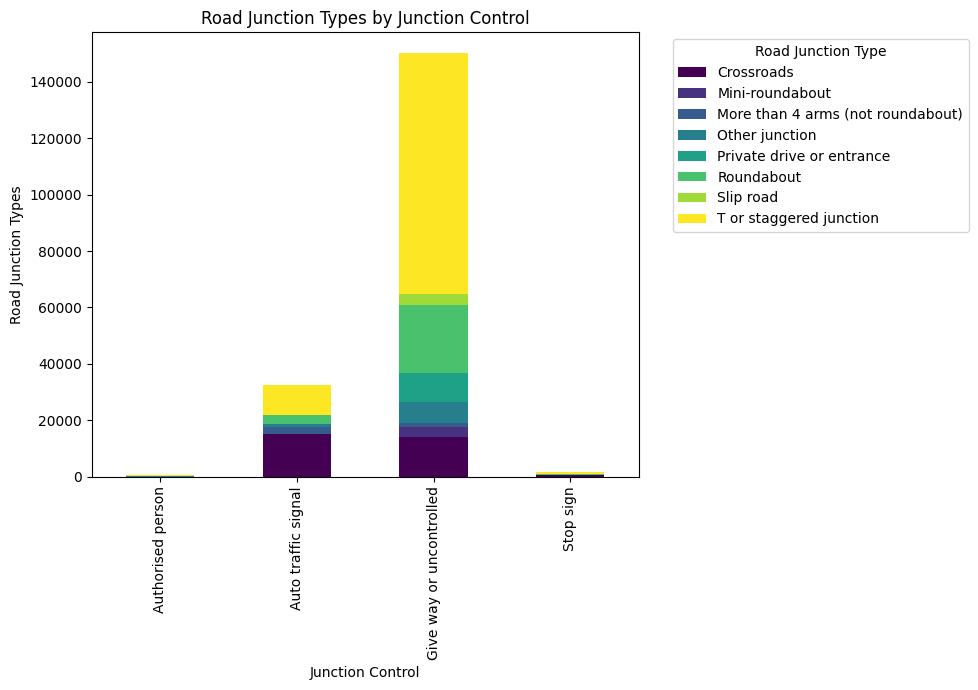

In [37]:
# Creation of a stacked bar chart
con_table.plot(kind ='bar', stacked = True, figsize = (10,7), colormap = 'viridis')

plt.title('Road Junction Types by Junction Control')
plt.xlabel('Junction Control')
plt.ylabel('Road Junction Types')
plt.legend(title = 'Road Junction Type', bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.xticks(rotation = 90)  
plt.tight_layout() 
plt.show()

In [22]:
# Displaying contingency table to be used for chi-square test
con_table = pd.crosstab(filtered_accidents['Junction_Control'], filtered_accidents['Junction_Detail'])
print(con_table)

Junction_Detail           Crossroads  Mini-roundabout  \
Junction_Control                                        
Authorised person                 56                3   
Auto traffic signal            15122               45   
Give way or uncontrolled       14224             3287   
Stop sign                        543               11   

Junction_Detail           More than 4 arms (not roundabout)  Other junction  \
Junction_Control                                                              
Authorised person                                        12              54   
Auto traffic signal                                    2414             936   
Give way or uncontrolled                               1690            7179   
Stop sign                                                32              84   

Junction_Detail           Private drive or entrance  Roundabout  Slip road  \
Junction_Control                                                             
Authorised person         

In [23]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(con_table)

# Display the results
print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_value < 0.05:
    print("There is an association between junction control and road junction types.")
elif p_value >= 0.05:
    print("There is no association between junction control and road junction types.")

Chi-squared Statistic: 35175.69920967542
P-value: 0.0
Degrees of Freedom: 21
Expected Frequencies:
 [[7.44888387e+01 8.32324776e+00 1.03182402e+01 2.05295170e+01
  2.63304177e+01 6.78197929e+01 1.06092802e+01 2.40580666e+02]
 [5.24878542e+03 5.86489765e+02 7.27065017e+02 1.44659296e+03
  1.85534793e+03 4.77885743e+03 7.47572878e+02 1.69522886e+04]
 [2.43484377e+04 2.72065028e+03 3.37276072e+03 6.71055790e+03
  8.60671942e+03 2.21685024e+04 3.46789403e+03 7.86394775e+04]
 [2.73288027e+02 3.05367086e+01 3.78560272e+01 7.53196222e+01
  9.66022296e+01 2.48820329e+02 3.89238081e+01 8.82653248e+02]]
There is an association between junction control and road junction types.


In [24]:
# Function for Cramér's V
def cramers_v(x, y):
    con_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(con_table)[0]
    n = con_table.sum().sum()
    phi2 = chi2 / n
    r, k = con_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [25]:
# Calculate Cramér's V
cramers_value = cramers_v(filtered_accidents['Junction_Detail'], filtered_accidents['Junction_Control'])
print("Cramér's V:", cramers_value)

Cramér's V: 0.2520064728194587
